In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Covid Data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


# 1.What is the average age of the patients

In [8]:
df['AGE'].mean()

41.794102472403026

# 2.What is the maximum and minimum age in the dataset?

In [12]:
max=df['AGE'].max()
max

121

In [13]:
min=df['AGE'].min()
min

0

# 3.How many unique patients are there in the datasets

In [17]:
df['PATIENT_TYPE'].nunique()

2

In [16]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

# 4.What is the distribution of patient types(returned home vs hospitalized)

<Axes: xlabel='Patient_Type_Label', ylabel='count'>

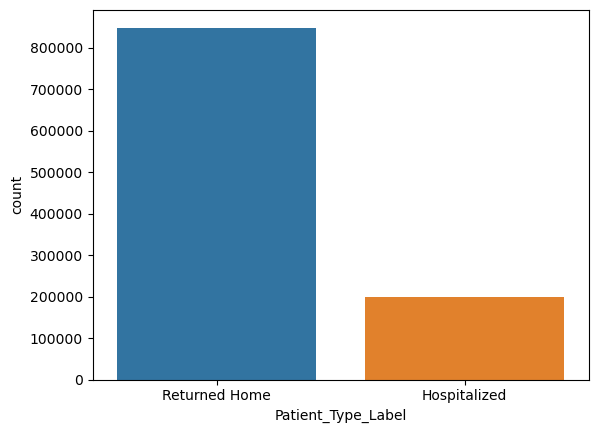

In [78]:
df['Patient_Type_Label'] = df['PATIENT_TYPE'].apply(lambda x: 'Returned Home' if x == 1 else 'Hospitalized')

sns.countplot(x=df['Patient_Type_Label'])

# 5.What are the top three pre_existing conditions among the patients

In [48]:
pre_existing_conditions=['DIABETES', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC','TOBACCO']
new_df=df[pre_existing_conditions].sum().sort_values(ascending=False)
new_df.head(3)

OTHER_DISEASE     2553430
INMSUPR           2409764
CARDIOVASCULAR    2371677
dtype: int64

In [35]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

# 6.How many patients have missing values for the 'usmr' column?

In [52]:
df['USMER'].isna().sum()

0

# 7.Can we visualize the correlation between different pre_existing conditions using a heatmap

<Axes: >

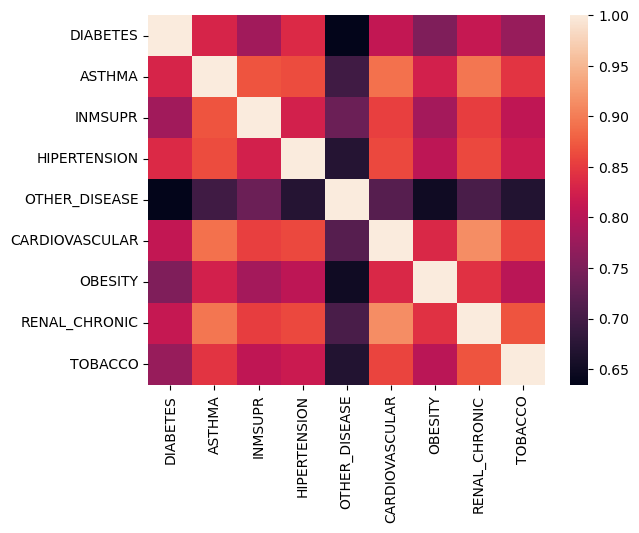

In [55]:
pre_existing_conditions=['DIABETES', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC','TOBACCO']
df[pre_existing_conditions].corr()
sns.heatmap(df[pre_existing_conditions].corr())

# 8.How does age correlate with the different covid test findings

In [58]:
age_covid_test_findings=['AGE','INTUBED', 'PNEUMONIA', 'DIABETES', 'ASTHMA', 'HIPERTENSION', 'OBESITY']
df[age_covid_test_findings].corr()

,AGE,INTUBED,PNEUMONIA,DIABETES,ASTHMA,HIPERTENSION,OBESITY
AGE,1.000000,-0.317945,-0.073127,0.004422,0.022715,-0.004964,0.015500
INTUBED,-0.317945,1.000000,0.079743,-0.009215,-0.023446,-0.007628,-0.020217
PNEUMONIA,-0.073127,0.079743,1.000000,-0.004484,-0.005392,-0.004799,-0.004276
DIABETES,0.004422,-0.009215,-0.004484,1.000000,0.829349,0.835018,0.752739
ASTHMA,0.022715,-0.023446,-0.005392,0.829349,1.000000,0.864264,0.824631
HIPERTENSION,-0.004964,-0.007628,-0.004799,0.835018,0.864264,1.000000,0.805127
OBESITY,0.015500,-0.020217,-0.004276,0.752739,0.824631,0.805127,1.000000


# 9.What is the distribution of ages among different outcomes(recovered,died)?


<Axes: xlabel='AGE', ylabel='OUTCOME'>

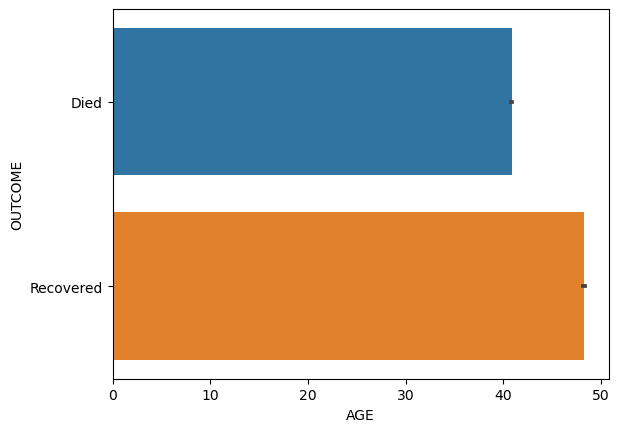

In [77]:
df['OUTCOME'] = df.apply(lambda x: 'Died' if x['PATIENT_TYPE'] == 1 or x['DATE_DIED'] != '9999-99-99' else 'Recovered', axis=1)

sns.barplot(x='AGE',y='OUTCOME',data=df)

# 10.Can we create a bar chart to showthat  the count of patients in each medical unit?

<Axes: xlabel='MEDICAL_UNIT', ylabel='count'>

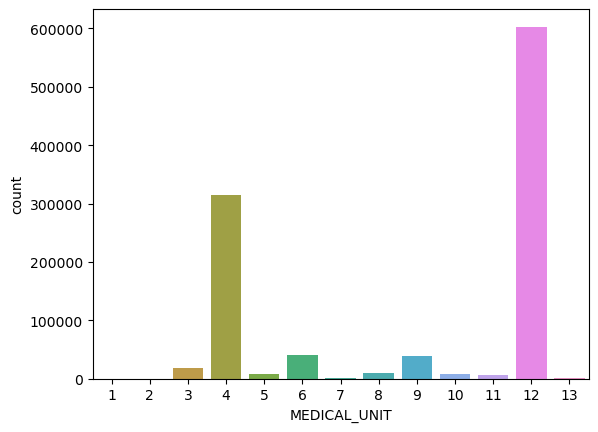

In [80]:
sns.countplot(x=df['MEDICAL_UNIT'])

# 11.how does the distribution of ages of patients vary between male and female patients?

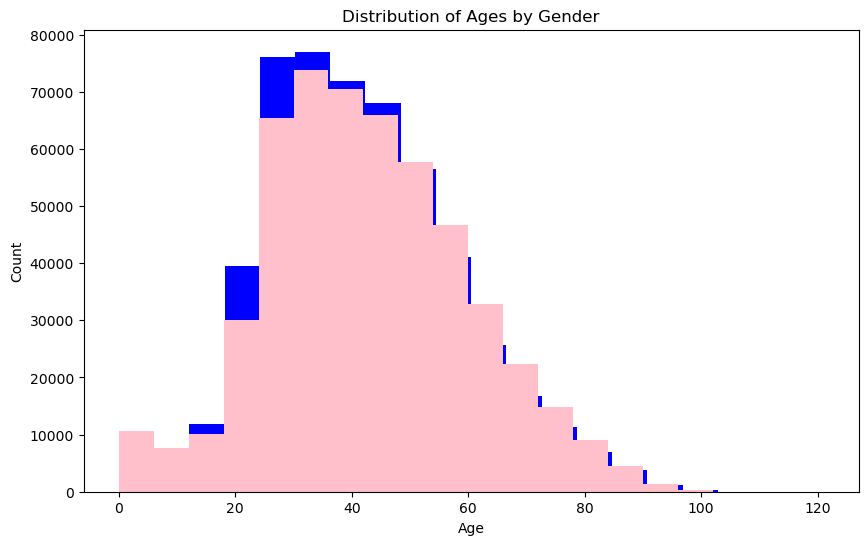

In [20]:
male_df = df[df['SEX'] == 1]  
female_df = df[df['SEX'] == 2]

plt.figure(figsize=(10, 6))

plt.hist(male_df['AGE'], bins=20, label='Male', color='blue')
plt.hist(female_df['AGE'],bins=20,label='Female', color='pink')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages by Gender')


plt.show()




# 12.Can we visualize the percentage of smokers among the patients?

In [50]:
def smokernonsmoker(x):
    if x==1:
        return'smoker'
    elif x==2:
        return'nonsmoker'
    
df['Smoker'] = df['TOBACCO'].apply(smokernonsmoker)
df
smoker_counts = df['Smoker'].value_counts()
smoker_counts


Smoker
nonsmoker    960979
smoker        84376
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x233a3543390>,
 [Text(-1.0648241557585898, 0.27595201994732105, 'nonsmoker'),
  Text(1.0648241428403422, -0.27595206979533715, 'smoker')],
 [Text(-0.5808131758683216, 0.15051928360762964, '91.9%'),
  Text(0.5808131688220048, -0.1505193107974566, '8.1%')])

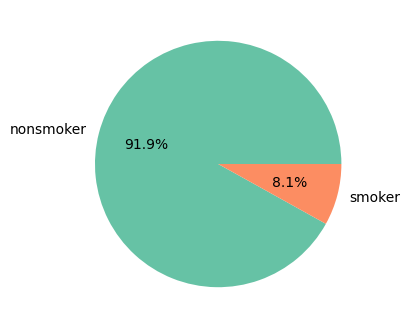

In [51]:
plt.figure(figsize=(4, 4))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))


# 13.What is the average age of patients with and without diabetics

In [121]:
df['DIABETES'].value_counts()

DIABETES
2     920248
1     124989
98      3338
Name: count, dtype: int64

In [140]:
df.groupby('DIABETES')['AGE'].mean()
diabetic_age=df.groupby('DIABETES')['AGE'].mean()[1]
diabetic_age

56.96422085143492

In [143]:

notdiabetic_age=df.groupby('DIABETES')['AGE'].mean()[2]
notdiabetic_age

39.707406047065575

# 14.how does the distribution of ages differ between ICU-ADMITTED AND NON-ICU -ADMITTED PATIENTS

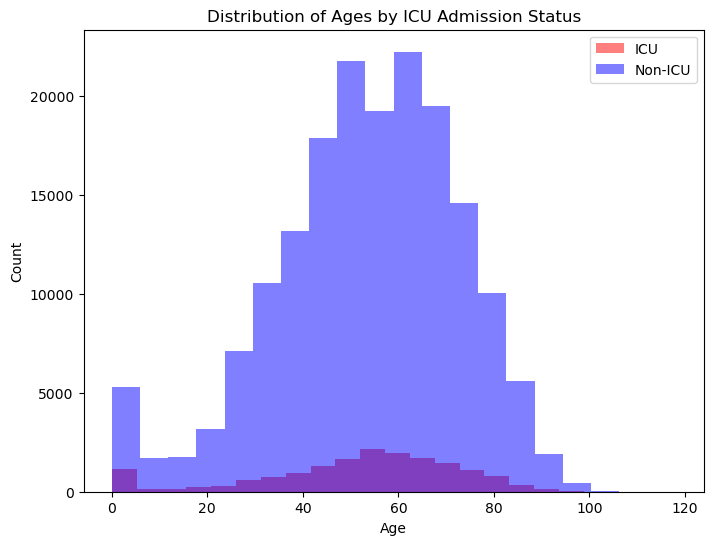

In [91]:




icu_df = df[df['ICU'] == 1]
nonicu_df = df[df['ICU'] == 2]

plt.figure(figsize=(8, 6))

plt.hist(icu_df['AGE'], bins=20, label='ICU', color='red', alpha=0.5)
plt.hist(nonicu_df['AGE'], bins=20, label='Non-ICU', color='blue', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages by ICU Admission Status')
plt.legend()

plt.show()








# 15.can we visualize the trend of COVID cases over time(if time information is available )

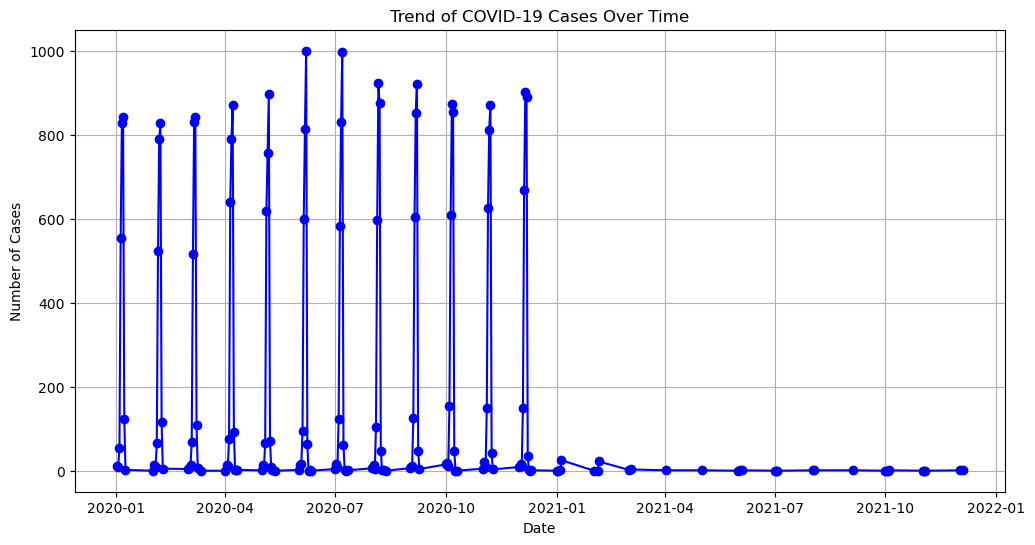

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Assuming 'DATE_DIED' column contains the date information

# Convert 'DATE_DIED' to datetime format
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')

# Group by date and count the number of cases
daily_cases = df.groupby(df['DATE_DIED'].dt.date).size()


plt.figure(figsize=(12, 6))
plt.plot(daily_cases.index, daily_cases.values, marker='o', linestyle='-', color='blue')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Trend of COVID-19 Cases Over Time')
plt.grid(True)
plt.show()

# 16.Is there a difference in age distribution between pregnant and non-pregnant patients?

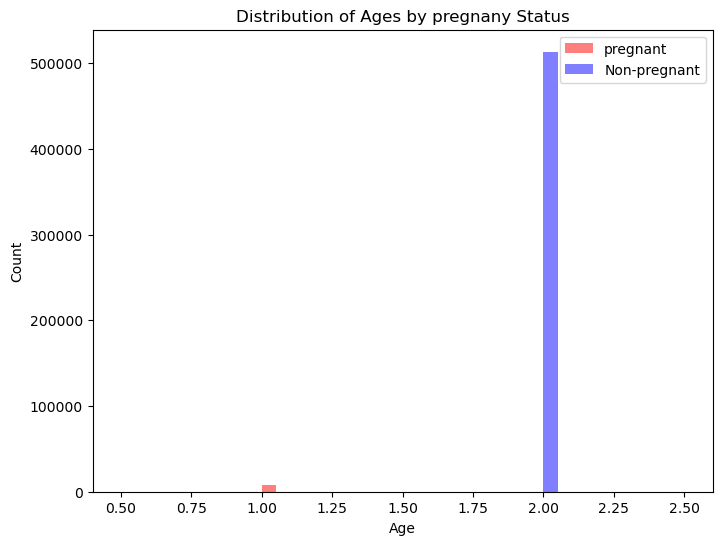

In [98]:
preg_df = df[df['PREGNANT'] == 1]
nonpreg_df = df[df['PREGNANT'] == 2]

plt.figure(figsize=(8, 6))

plt.hist(preg_df['PREGNANT'], bins=20, label='pregnant', color='red', alpha=0.5)
plt.hist(nonpreg_df['PREGNANT'], bins=20, label='Non-pregnant', color='blue', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages by pregnany Status')
plt.legend()

plt.show()





# 17.How does the distribution of ages vary between different outcomes (recoverd,died) for diabetic patients?

Text(0, 0.5, 'Age')

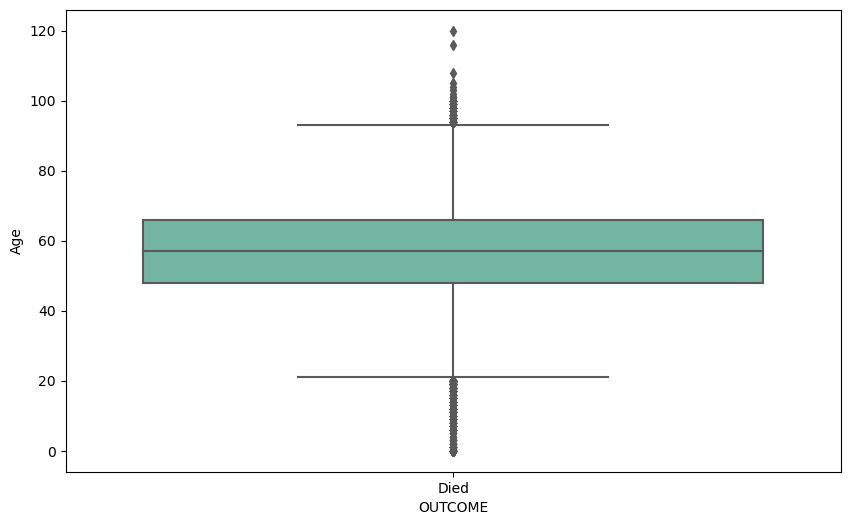

In [103]:
diabetic_df = df[df['DIABETES'] == 1]  # Assuming '2' represents diabetic patients

df['OUTCOME'] = df.apply(lambda x: 'Died' if x['PATIENT_TYPE'] == 1 or x['DATE_DIED'] != '9999-99-99' else 'Recovered', axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='OUTCOME', y='AGE', data=diabetic_df, palette='Set2')

plt.xlabel('OUTCOME')
plt.ylabel('Age')